In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


time series dataset diperoleh dari kaggle yaitu : https://www.kaggle.com/datasets/shenba/time-series-datasets yang terdiri dari beberapa dataset dan memilih monthly-beer-production-in-aus.csv untuk dilakukan visualisasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = "/content/drive/My Drive/monthly-beer-production-in-austr.csv"

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path, parse_dates=True, index_col = "Month")

# Tampilkan dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [ ]:
print(df.describe())

       Monthly beer production
count               476.000000
mean                136.395378
std                  33.738725
min                  64.800000
25%                 112.900000
50%                 139.150000
75%                 158.825000
max                 217.800000


# 1. Line Plot

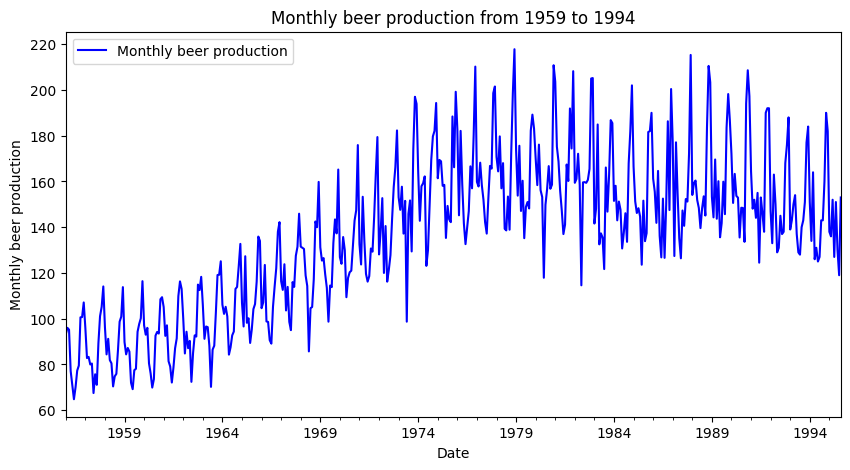

In [ ]:
ax = df.plot(color='blue', figsize=(10,5))
ax.set_xlabel('Date')
ax.set_ylabel('Monthly beer production')
ax.set_title('Monthly beer production from 1959 to 1994')
plt.show()

# Customize time series plot

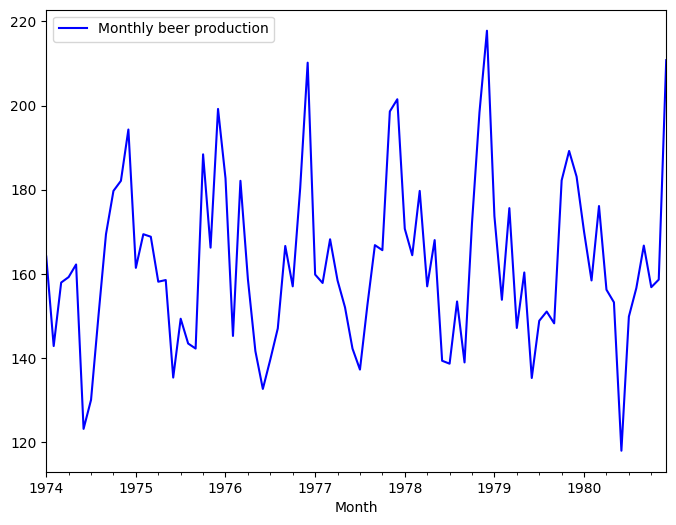

In [ ]:
df_subset = df['1974':'1980']
ax = df_subset.plot(color='blue', fontsize=10, figsize=(8, 6))
plt.show()

melihat periode waktu pada tahun 1974 sampai 1980

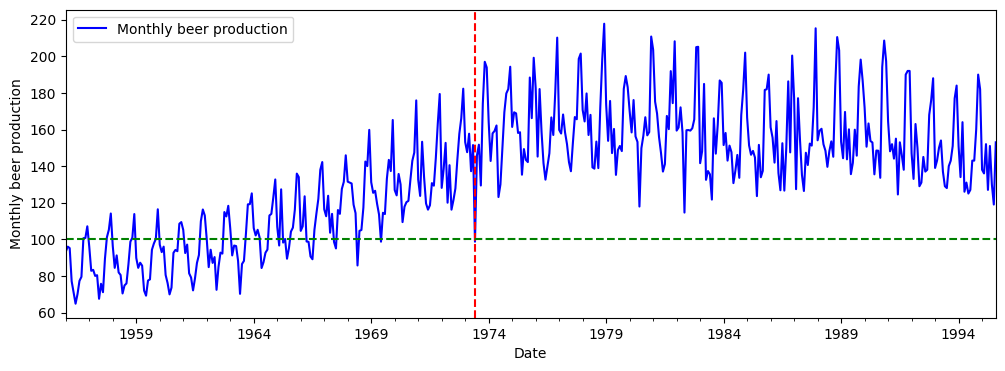

In [ ]:
# adding markers
ax = df.plot(color='blue', figsize=(12,4))
ax.set_xlabel('Date')
ax.set_ylabel('Monthly beer production')
ax.axvline('1973-06-01', color='red', linestyle='--')
ax.axhline(100, color='green', linestyle='--')

anotasi tambahan untuk melihat pengamatan/peristiwa tertentu dalam rangkaian waktu, dimana pada contoh ini garis vertikal dan horizontal digambar menggunakan metode axvline dan axhline

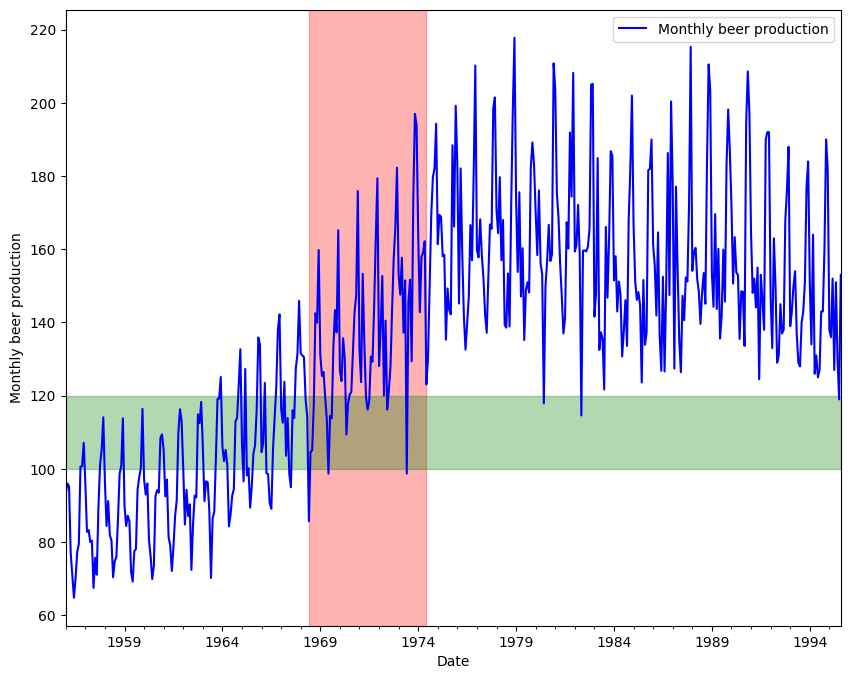

In [ ]:
# Highlighting regions of interest
ax = df.plot(color='blue', figsize=(10,8))
ax.set_xlabel('Date')
ax.set_ylabel('Monthly beer production')
ax.axvspan('1968-06-01', '1974-06-01', color='red', alpha=0.3)
ax.axhspan(120, 100, color='green', alpha=0.3)

highlight daerah yang diminati dengan menambahkan bagian yang diarsir ke wilayah/daerah tertentu di plot menggunakan metode axvspan dan axhspan untuk menghasilkan masing-masing wilayah vertikal dan horizontal

# 2. Summary Statistics and Diagnostics

In [ ]:
# count missing values
print(df.isnull().sum())

Monthly beer production    0
dtype: int64


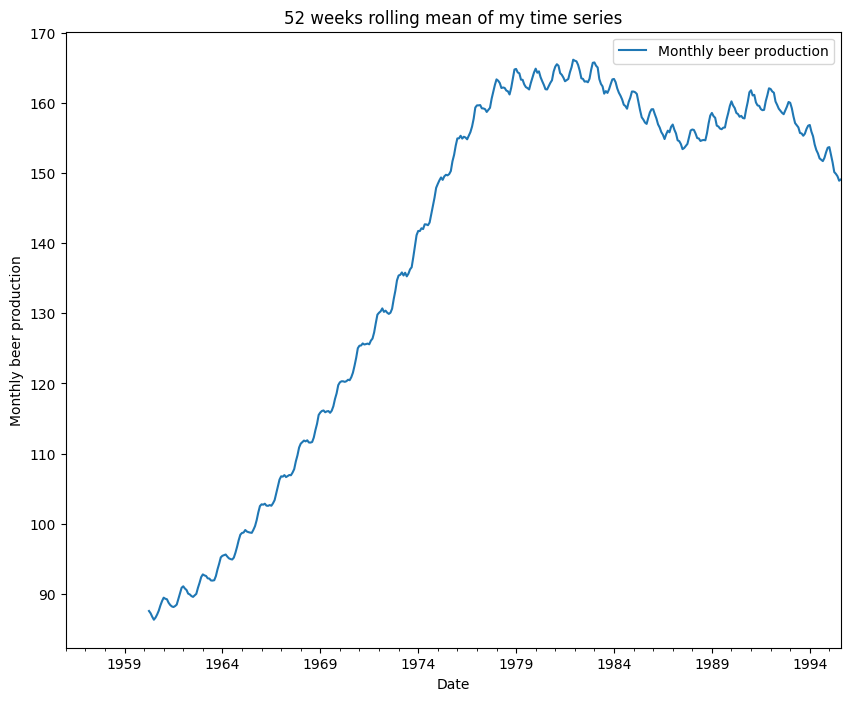

In [ ]:
# The moving average model
df_mean = df.rolling(window=52).mean()
ax = df_mean.plot(figsize=(10,8))
ax.set_xlabel("Date")
ax.set_ylabel("Monthly beer production")
ax.set_title("52 weeks rolling mean of my time series")
plt.show()

 menampilkan rolling mean (rata-rata bergulir) tersebut dalam periode 52 minggu, membantu dalam memahami pola jangka panjang dari data time series.

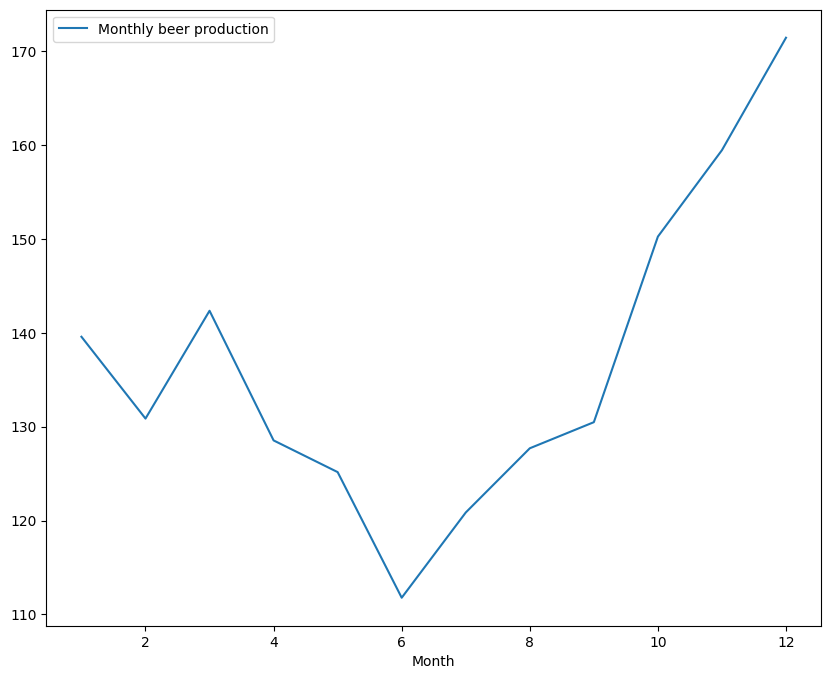

In [ ]:
# Plotting aggregate values of your time series
index_month = df.index.month
df_by_month = df.groupby(index_month).mean()
df_by_month.plot(figsize=(10,8))
plt.show()

visualisasi time series berdasarkan bulan dalam setahun dan untuk setiap tahun,dapat membantu dalam pemahaman lebih lanjut tentang perilaku data dalam skala bulanan.

dari plot bulanan ini, dapat kita lihat mulai bulan ke-8, produksi bir meningkat secara signifikan dan produksi mencapai puncaknya di bulan ke-12 menunjukkan pola musiman yang terkait dengan peristiwa tertentu yang terjadi pada bulan-bulan tersebut dengan peningkatan permintaan menjelang akhir tahun.

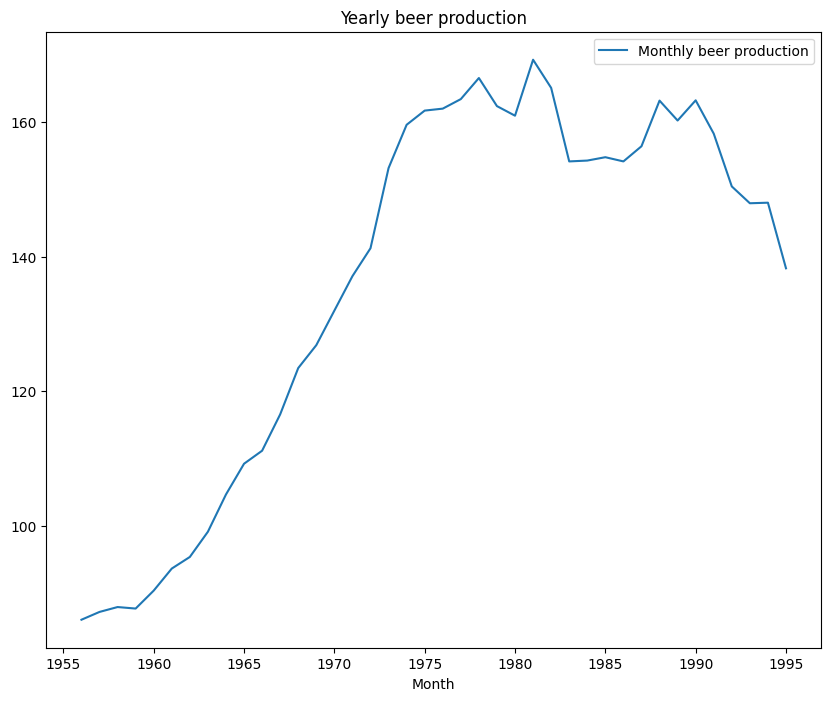

In [ ]:
# Plotting aggregate values of your time series
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
df_by_year.plot(figsize=(10,8))
plt.title('Yearly beer production')
plt.show()

dari plot produksi bir tahunan, dari tahun 1955 hingga sekitar tahun 1980, produksi bir tahunan terus meningkat secara signifikan, dan sekitar tahun 1980 produksi bir tahunan mencapai puncaknya diikuti dengan penurunan setelah mencapai titik tertinggi.

## 2.1 Resampling and Rolling

In [ ]:
# Resample the data to weekly frequency and calculate the mean
weekly_avg_df = df.resample('W').mean()

# Drop any rows with NaN values (if necessary)
weekly_avg_df = weekly_avg_df.dropna()

# Print the first few rows of the resulting DataFrame
print(weekly_avg_df.head())


            Monthly beer production
Month                              
1956-01-01                     93.2
1956-02-05                     96.0
1956-03-04                     95.2
1956-04-01                     77.1
1956-05-06                     70.9


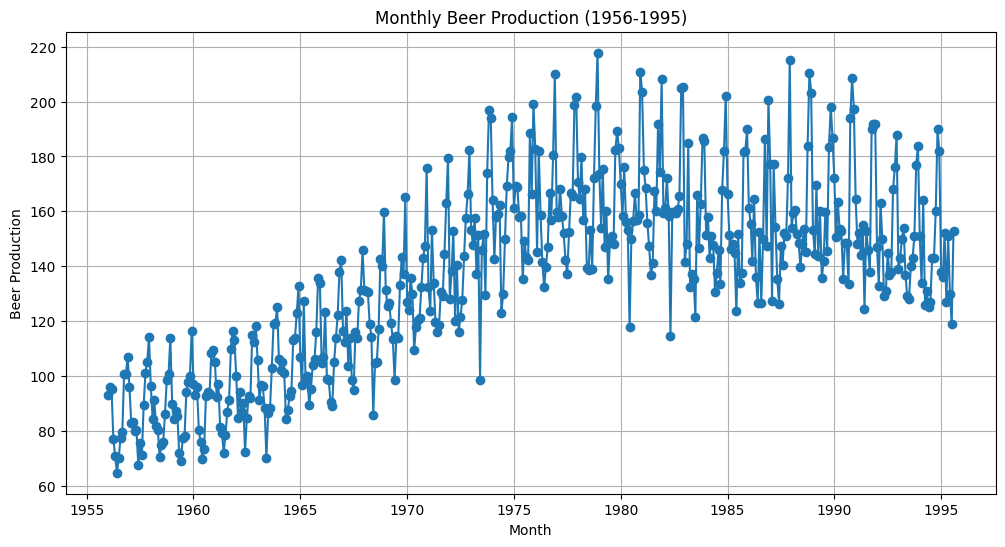

In [ ]:
import matplotlib.pyplot as plt

# Plot the 'Monthly beer production' data
plt.figure(figsize=(12,6))
plt.plot(df['Monthly beer production'], marker='o', linestyle='-')
plt.title('Monthly Beer Production (1956-1995)')
plt.xlabel('Month')
plt.ylabel('Beer Production')
plt.grid(True)
plt.show()


# 3. Seasonality, Trend and Noise

## 3.2 Seasonality, trend, and noise in time series data

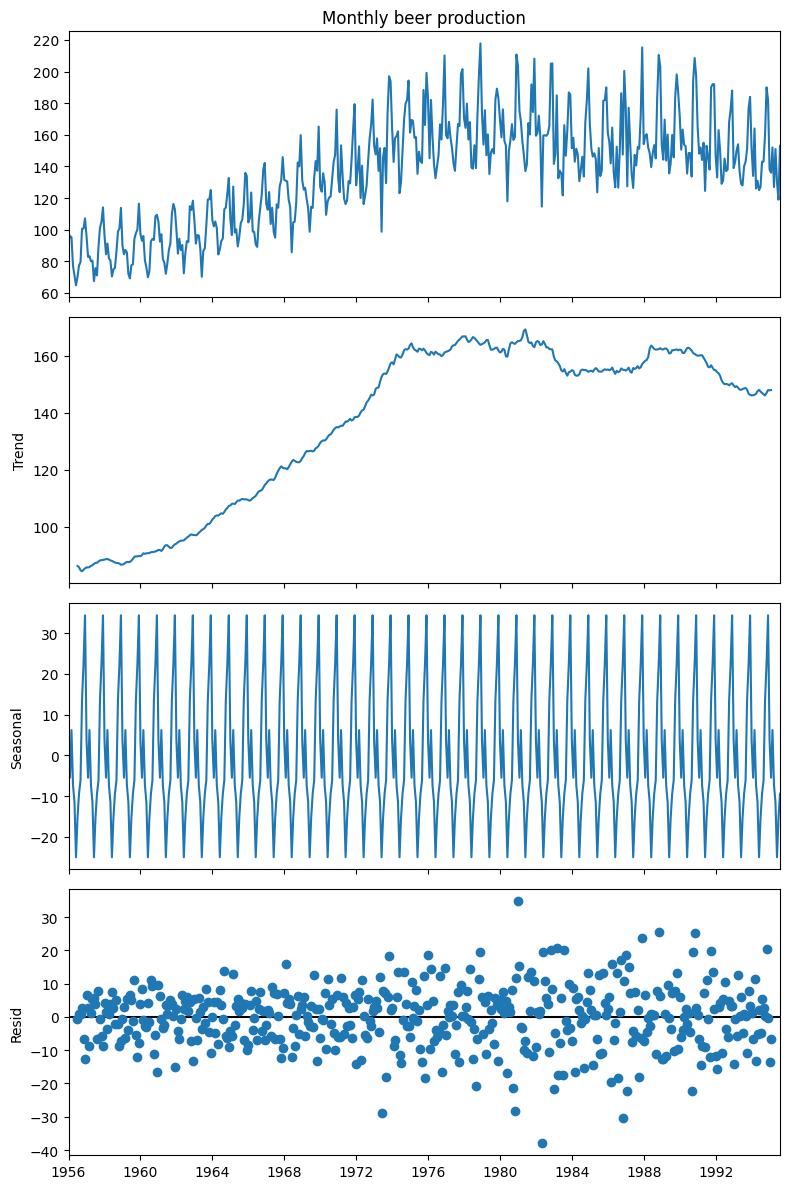

In [ ]:
#Time series decomposition
import statsmodels.api as sm
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 12  # resizing the image to be big enough for us

decomposition = sm.tsa.seasonal_decompose(df['Monthly beer production'])
fig = decomposition.plot()
plt.show()


Secara umum, sebagian besar deret waktu dapat dipecah menjadi tiga komponen utama. Yang pertama adalah musiman, yang menggambarkan sinyal periodik dalam deret waktu. Komponen kedua adalah tren, yang menggambarkan apakah deret waktu menurun, konstan, atau meningkat seiring waktu. Terakhir, komponen ketiga adalah noise, yang menggambarkan varians dan volatilitas deret waktu yang tidak dapat dijelaskan. dapat dilihat beberapa contoh agar lebih memahami ketiga komponen ini.

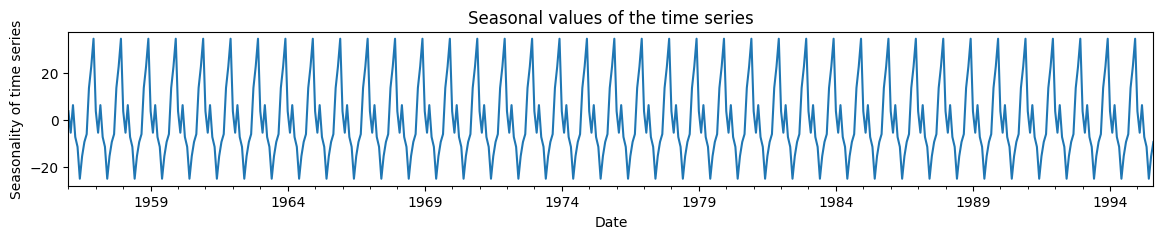

In [ ]:
# Seasonality component in time series

decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()

Seasonality dalam time series adalah fenomena di mana data mengalami fluktuasi atau perubahan secara teratur pada interval waktu tertentu, seperti harian, bulanan, atau tahunan. Pola ini sering terkait dengan faktor-faktor seperti cuaca, liburan, atau kebiasaan konsumsi yang berubah-ubah sesuai musim.

Dalam konteks produksi bir, seasonality bisa mencerminkan peningkatan konsumsi bir selama musim panas atau liburan, yang kemudian berpengaruh pada produksi.

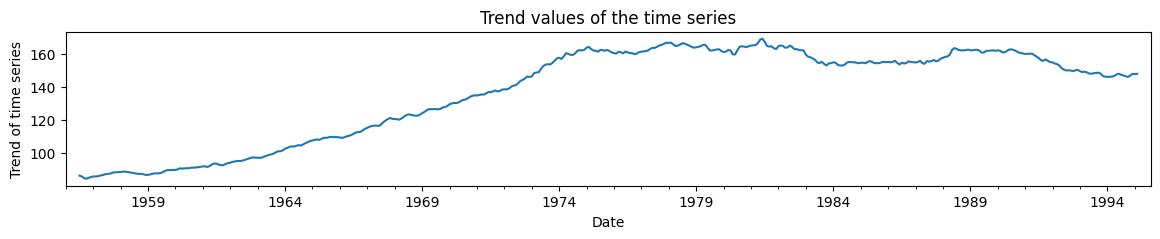

In [ ]:
# Trend component in time series
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

Komponen tren mencerminkan perkembangan keseluruhan rangkaian waktu/ time series dan dapat diekstraksi menggunakan perintah dekomposisi .trend.
Tren ini menunjukkan bahwa terdapat periode pertumbuhan yang diikuti oleh periode stabilitas dalam data seri waktu yang diamati.
 Dari tahun 1959 hingga sekitar 1979, terjadi peningkatan stabil dalam nilai seri waktu. Setelah sekitar tahun 1979, tren menunjukkan stabilisasi dan nilai seri waktu tetap relatif konstan hingga tahun 1994.


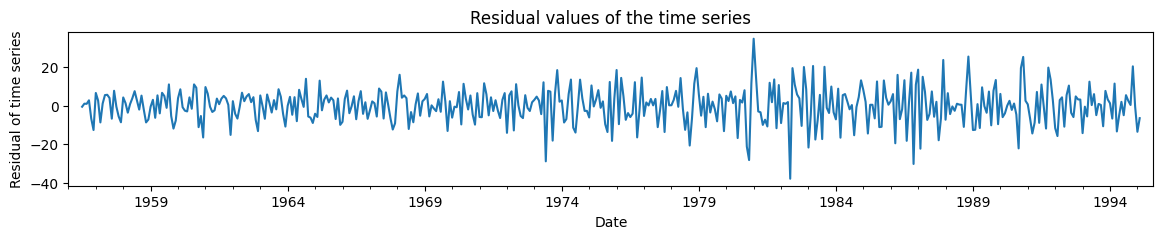

In [ ]:
#Noise component in time series
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

Komponen sisa/residu menggambarkan pengaruh acak dan tidak teratur yang tidak dapat dikaitkan dengan tren atau musiman.

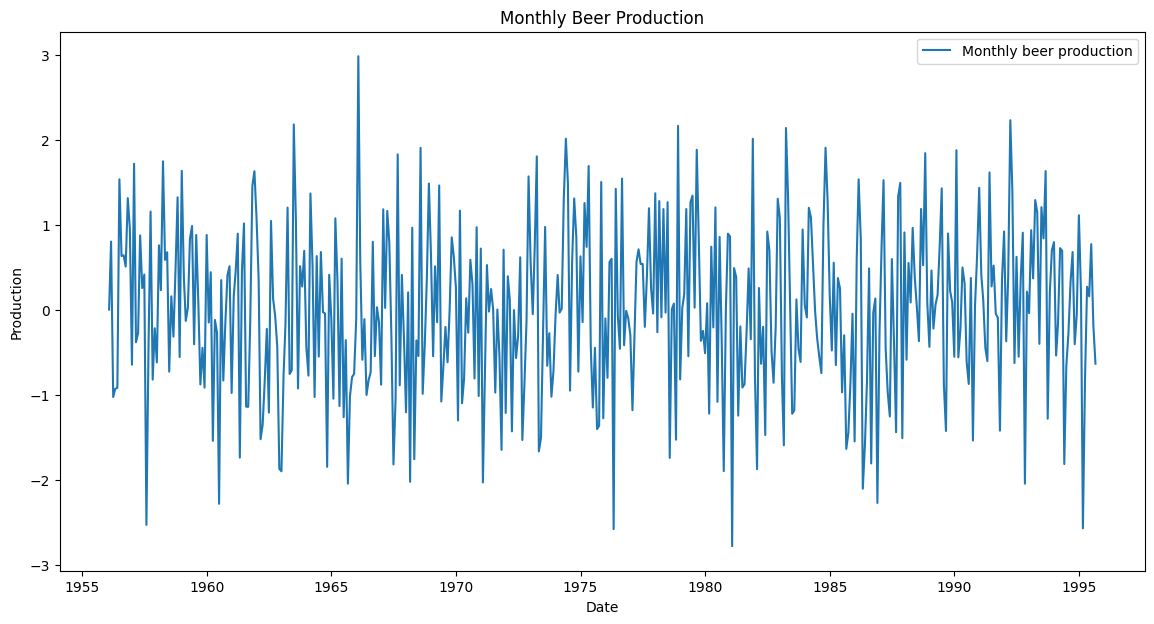

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Contoh DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='1956-01-01', periods=476, freq='M'),
    'Monthly beer production': np.random.randn(476)
})
df.set_index('Date', inplace=True)

# Visualisasi data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Monthly beer production'], label='Monthly beer production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Monthly Beer Production')
plt.legend()
plt.show()



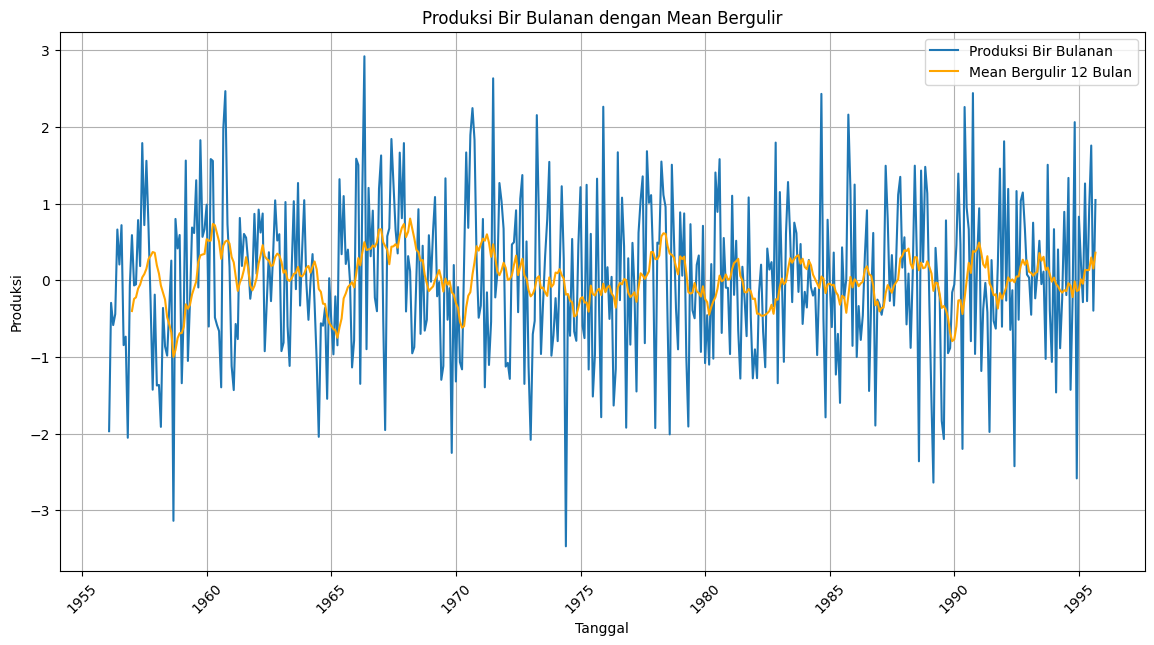

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Contoh DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='1956-01-01', periods=476, freq='M'),
    'Monthly beer production': np.random.randn(476)
})
df.set_index('Date', inplace=True)

# Menambahkan kolom mean bergulir untuk menghaluskan data agar lebih mudah mengamati siklus
df['Rolling Mean'] = df['Monthly beer production'].rolling(window=12).mean()

# Visualisasi data dengan mean bergulir
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Monthly beer production'], label='Produksi Bir Bulanan')
plt.plot(df.index, df['Rolling Mean'], label='Mean Bergulir 12 Bulan', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Produksi')
plt.title('Produksi Bir Bulanan dengan Mean Bergulir')
plt.legend()
plt.grid(True)  # Menambahkan grid untuk membaca grafik dengan lebih mudah

# Memperbaiki tanda sumbu x untuk menunjukkan setiap 5 tahun agar lebih jelas
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)  # Memutar label sumbu x agar tidak bertumpuk

plt.show()


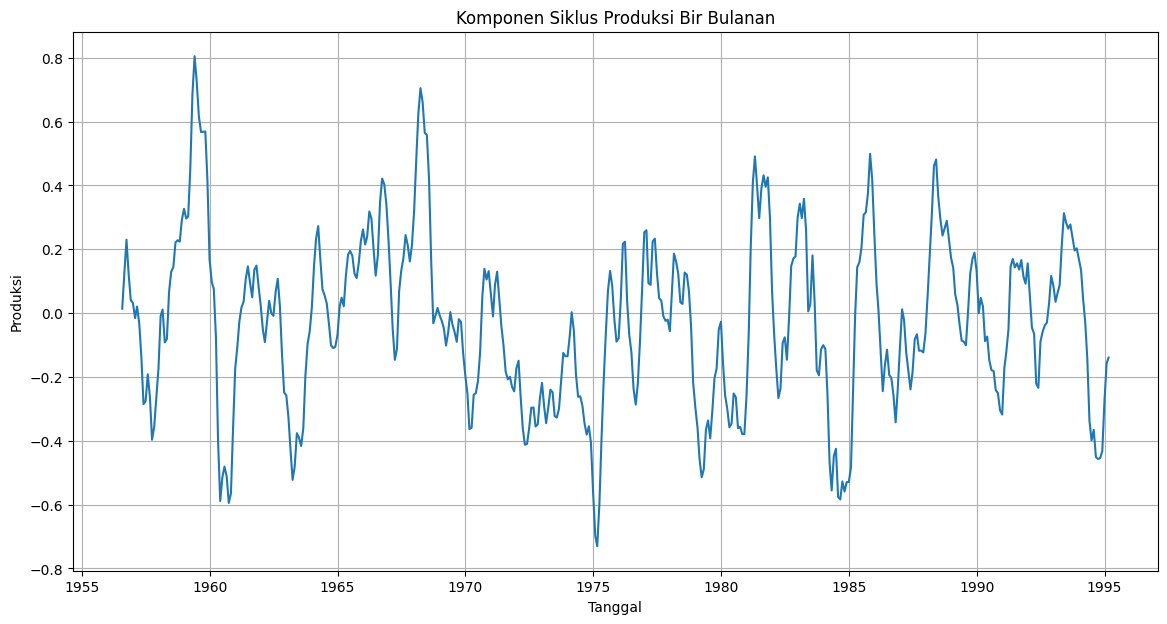

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Contoh DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='1956-01-01', periods=476, freq='M'),
    'Monthly beer production': np.random.randn(476)
})
df.set_index('Date', inplace=True)

# Dekomposisi musiman untuk menghaluskan data dan melihat komponen siklus dan tren
result = seasonal_decompose(df['Monthly beer production'], model='additive')

# Plot komponen siklus
plt.figure(figsize=(14, 7))
plt.plot(result.trend)
plt.xlabel('Tanggal')
plt.ylabel('Produksi')
plt.title('Komponen Siklus Produksi Bir Bulanan')
plt.grid(True)

